# **ANÁLISE EXPLORATORIA DO DADOS**

Nesse projeto foi feito uma análise de um conjunto de dados relacionado a padrão de clientes de cartão de crédito, entrando nos campos de limite de cartão de crédito, utilização e pagamento com valor em dólar taiwanês (TWD) coletados no período de abril a setembro do ano de 2005. Tendo como fonte do Dataset o [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients).

**EQUIPE**

Anna Vithoria

Cláudio Más

Oderlan Freire

###Bibiliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px

In [ ]:
warnings.filterwarnings('ignore')

## Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xls')

In [ ]:
df

In [ ]:
dictionary = pd.read_csv("data/external/dicionario.csv")
dictionary

### Pre-processamento


Renomear colunas

In [ ]:
nomes = df.iloc[0]
nomes = dict(nomes)
nomes

{'Unnamed: 0': 'ID',
 'X1': 'LIMIT_BAL',
 'X2': 'SEX',
 'X3': 'EDUCATION',
 'X4': 'MARRIAGE',
 'X5': 'AGE',
 'X6': 'PAY_0',
 'X7': 'PAY_2',
 'X8': 'PAY_3',
 'X9': 'PAY_4',
 'X10': 'PAY_5',
 'X11': 'PAY_6',
 'X12': 'BILL_AMT1',
 'X13': 'BILL_AMT2',
 'X14': 'BILL_AMT3',
 'X15': 'BILL_AMT4',
 'X16': 'BILL_AMT5',
 'X17': 'BILL_AMT6',
 'X18': 'PAY_AMT1',
 'X19': 'PAY_AMT2',
 'X20': 'PAY_AMT3',
 'X21': 'PAY_AMT4',
 'X22': 'PAY_AMT5',
 'X23': 'PAY_AMT6',
 'Y': 'default payment next month'}

In [ ]:
df.rename(columns=nomes, inplace= True)

In [ ]:
df = df.drop(0)
df.head()

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
1  1     20000   2         2        1  24     2     2    -1    -1  ...   
2  2    120000   2         2        2  26    -1     2     0     0  ...   
3  3     90000   2         2        2  34     0     0     0     0  ...   
4  4     50000   2         2        1  37     0     0     0     0  ...   
5  5     50000   1         2        1  57    -1     0    -1     0  ...   

  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1         0         0         0        0      689        0        0        0   
2      3272      3455      3261        0     1000     1000     1000        0   
3     14331     14948     15549     1518     1500     1000     1000     1000   
4     28314     28959     29547     2000     2019     1200     1100     1069   
5     20940     19146     19131     2000    36681    10000     9000      689   

  PAY_AMT6 default payment next month  
1        0                          1  
2     2000                          1  
3     5000                          0  
4     1000                          0  
5      679                          0  

[5 rows x 25 columns]

Mudar tipo do dados

In [ ]:
df =df.astype(int)

In [ ]:
df['SEX']= df['SEX'].replace([1,2],['Male','Female'])
df['EDUCATION']= df['EDUCATION'].replace([1,2,3,[4,5,6,0]],['Graduate School','University','High School','Other'])
df['default payment next month'] = df['default payment next month'].replace([0,1],['no','yes'])

In [ ]:
df['MARRIAGE']= df['MARRIAGE'].replace([1,2,[3,0]],['Married','Single','Others'])

In [ ]:
df[['PAY_0','PAY_2', 'PAY_3','PAY_4', 'PAY_5','PAY_6']]= df[['PAY_0','PAY_2', 'PAY_3','PAY_4', 'PAY_5','PAY_6']].replace({-2:0,-1:0,0:0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Descrição dos dados

In [ ]:
print("Tamanho: ", df.shape)
print("Nome dos Atributos: ", df.columns)

Tamanho:  (30000, 25)
Nome dos Atributos:  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


### Estatistica

In [ ]:
df.describe().T

count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_0      30000.0       0.356767       0.760594       0.0      0.00   
PAY_2      30000.0       0.320033       0.801727       0.0      0.00   
PAY_3      30000.0       0.304067       0.790589       0.0      0.00   
PAY_4      30000.0       0.258767       0.761113       0.0      0.00   
PAY_5      30000.0       0.221500       0.717720       0.0      0.00   
PAY_6      30000.0       0.226567       0.715438       0.0      0.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   

                50%        75%        max  
ID          15000.5   22500.25    30000.0  
LIMIT_BAL  140000.0  240000.00  1000000.0  
AGE            34.0      41.00       79.0  
PAY_0           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0

In [ ]:
#Assimetria
df.skew()

ID            0.000000
LIMIT_BAL     0.992867
AGE           0.732246
PAY_0         2.809797
PAY_2         2.598928
PAY_3         2.856586
PAY_4         3.547022
PAY_5         3.966571
PAY_6         3.821385
BILL_AMT1     2.663861
BILL_AMT2     2.705221
BILL_AMT3     3.087830
BILL_AMT4     2.821965
BILL_AMT5     2.876380
BILL_AMT6     2.846645
PAY_AMT1     14.668364
PAY_AMT2     30.453817
PAY_AMT3     17.216635
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
dtype: float64

In [ ]:
#IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

ID            14999.50
LIMIT_BAL    190000.00
AGE              13.00
PAY_0             0.00
PAY_2             0.00
PAY_3             0.00
PAY_4             0.00
PAY_5             0.00
PAY_6             0.00
BILL_AMT1     63532.25
BILL_AMT2     61021.50
BILL_AMT3     57498.50
BILL_AMT4     52179.25
BILL_AMT5     48427.50
BILL_AMT6     47942.25
PAY_AMT1       4006.00
PAY_AMT2       4167.00
PAY_AMT3       4115.00
PAY_AMT4       3717.25
PAY_AMT5       3779.00
PAY_AMT6       3882.25
dtype: float64

In [ ]:
#Outiers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

outliers_iqr= df[outliers.any(1)]
outliers_iqr.count()

ID                            18141
LIMIT_BAL                     18141
SEX                           18141
EDUCATION                     18141
MARRIAGE                      18141
AGE                           18141
PAY_0                         18141
PAY_2                         18141
PAY_3                         18141
PAY_4                         18141
PAY_5                         18141
PAY_6                         18141
BILL_AMT1                     18141
BILL_AMT2                     18141
BILL_AMT3                     18141
BILL_AMT4                     18141
BILL_AMT5                     18141
BILL_AMT6                     18141
PAY_AMT1                      18141
PAY_AMT2                      18141
PAY_AMT3                      18141
PAY_AMT4                      18141
PAY_AMT5                      18141
PAY_AMT6                      18141
default payment next month    18141
dtype: int64

### Idade

A media da idades foi 35 anos, analisando o histograma e as skew a maior parte das pessoa tem menos de 40 anos, sendo que 16809 pessoa tem idade menor ou igual a media, isso representa mais de 50% do total de observações. No entanto a maior parte das pessoa possui entre 30 e 60 anos. Sendo que a idade que mais aparece é 29 anos, são no todo 1605 pessoas



In [ ]:
df['AGE'].mode()

0    29
Name: AGE, dtype: int64

In [ ]:
df[df['AGE'] ==29].count()

ID                            1605
LIMIT_BAL                     1605
SEX                           1605
EDUCATION                     1605
MARRIAGE                      1605
AGE                           1605
PAY_0                         1605
PAY_2                         1605
PAY_3                         1605
PAY_4                         1605
PAY_5                         1605
PAY_6                         1605
BILL_AMT1                     1605
BILL_AMT2                     1605
BILL_AMT3                     1605
BILL_AMT4                     1605
BILL_AMT5                     1605
BILL_AMT6                     1605
PAY_AMT1                      1605
PAY_AMT2                      1605
PAY_AMT3                      1605
PAY_AMT4                      1605
PAY_AMT5                      1605
PAY_AMT6                      1605
default payment next month    1605
dtype: int64

In [ ]:
df[df['AGE']<=35].count()


ID                            16809
LIMIT_BAL                     16809
SEX                           16809
EDUCATION                     16809
MARRIAGE                      16809
AGE                           16809
PAY_0                         16809
PAY_2                         16809
PAY_3                         16809
PAY_4                         16809
PAY_5                         16809
PAY_6                         16809
BILL_AMT1                     16809
BILL_AMT2                     16809
BILL_AMT3                     16809
BILL_AMT4                     16809
BILL_AMT5                     16809
BILL_AMT6                     16809
PAY_AMT1                      16809
PAY_AMT2                      16809
PAY_AMT3                      16809
PAY_AMT4                      16809
PAY_AMT5                      16809
PAY_AMT6                      16809
default payment next month    16809
dtype: int64

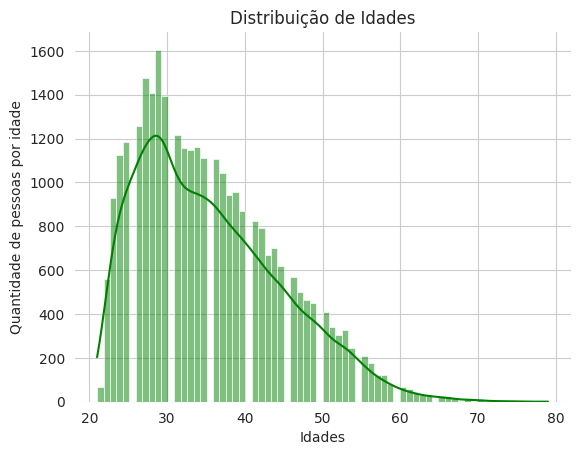

In [ ]:
sns.set_style('whitegrid')
ax = sns.histplot(df, x = 'AGE',color='green', kde=True)

plt.ylabel('Quantidade de pessoas por idade')
plt.xlabel('Idades')
plt.title('Distribuição de Idades')
ax.set(frame_on=False)
plt.show()

In [ ]:
df2=df.copy()
df2['faixa_etaria'] = df2['AGE'].apply(lambda AGE: 'jovem' if AGE <= 30 else ('adulto' if AGE < 60 else 'idoso'))

In [ ]:
fig = px.histogram(df2, x="faixa_etaria",
             color='faixa_etaria',text_auto='.2s',
            labels = {'faixa_etaria':'Faixa de Idade'}, title = 'Distribuição por Faixa Etaria',color_discrete_sequence=['lightgreen','green','darkgreen']

            )
fig.show()

### Credito



1.   Media de credito é 167484.32
2.   Valor minimo era 10000
3. Valor maximo 1000000
4. 75% das pessoas tinham credito menor que 240000
5. 17094 pessoa tem credito menor ou igual a media



In [ ]:

df.loc[(df['LIMIT_BAL'] < 167484.32)]['default payment next month'].value_counts()


no     12448
yes     4646
Name: default payment next month, dtype: int64

In [ ]:
df.loc[(df['LIMIT_BAL'] > 167484.32)]['default payment next month'].value_counts()

no     10916
yes     1990
Name: default payment next month, dtype: int64

In [ ]:
df.loc[(df['LIMIT_BAL'] <= 167484.32)]['EDUCATION'].value_counts()

University         8970
Graduate School    4331
High School        3560
Other               233
Name: EDUCATION, dtype: int64

In [ ]:
df.loc[(df['LIMIT_BAL'] <= 167484.32)]['PAY_0'].value_counts()

0    12311
1     2294
2     2092
3      279
4       67
5       23
8       15
6        8
7        5
Name: PAY_0, dtype: int64

In [ ]:
df.loc[(df['LIMIT_BAL'] <= 100000)]['default payment next month'].value_counts()

no     2756
yes    1555
Name: default payment next month, dtype: int64

In [ ]:
fig = px.histogram(df, x="LIMIT_BAL",
             text_auto='.2s',
            labels = {'default payment next month':'Inadimplencia'},
            title = 'Distribuição',
            color_discrete_sequence=['green']
            )
fig.show()

In [ ]:
fig = px.box(df2,
             x="faixa_etaria",
             y="LIMIT_BAL",title = 'Faixa Etaria X Crédito',
             labels={"faixa_etaria":'Faixa Etaria',"LIMIT_BAL":'Crédito'},
             color= 'faixa_etaria',
             color_discrete_sequence=['green','lightgreen','darkgreen','yellowgreen'])
fig.show()

### Educação

Do total 10585 pessoas tinham uma pos-graduação e 14030 graduação, isso representa 82% do todo, por sua vez as pessoas com apenas o ensino medio era 16.4%, o restante não declarou sua escolaridades. As pessoas que cursaram até o ensino médio possuiam uma media de idade maior, no entanto eles possuiam a menor média de  faixa de crédito, em oposição aos pos-graduados que possuem a maior faixa de credito

In [ ]:
df['EDUCATION'].unique()

array(['University', 'Graduate School', 'High School', 'Other'],
      dtype=object)

In [ ]:
df_educ = df[['AGE','LIMIT_BAL','EDUCATION']].groupby('EDUCATION')

In [ ]:
df_educ.describe().T

EDUCATION        Graduate School    High School          Other     University
AGE       count     10585.000000    4917.000000     468.000000   14030.000000
          mean         34.231838      40.299980      36.143162      34.722096
          std           8.270266      10.440760       9.313871       8.893848
          min          21.000000      21.000000      21.000000      21.000000
          25%          28.000000      32.000000      28.000000      27.000000
          50%          32.000000      40.000000      35.000000      33.000000
          75%          39.000000      48.000000      43.000000      41.000000
          max          79.000000      74.000000      66.000000      75.000000
LIMIT_BAL count     10585.000000    4917.000000     468.000000   14030.000000
          mean     212956.069910  126550.270490  181316.239316  147062.437634
          std      135474.936730  113979.322678  118385.690551  120672.282033
          min       10000.000000   10000.000000   10000.000000   10000.000000
          25%      100000.000000   50000.000000   90000.000000   50000.000000
          50%      200000.000000   80000.000000  170000.000000  110000.000000
          75%      300000.000000  180000.000000  240000.000000  210000.000000
          max     1000000.000000  760000.000000  710000.000000  800000.000000

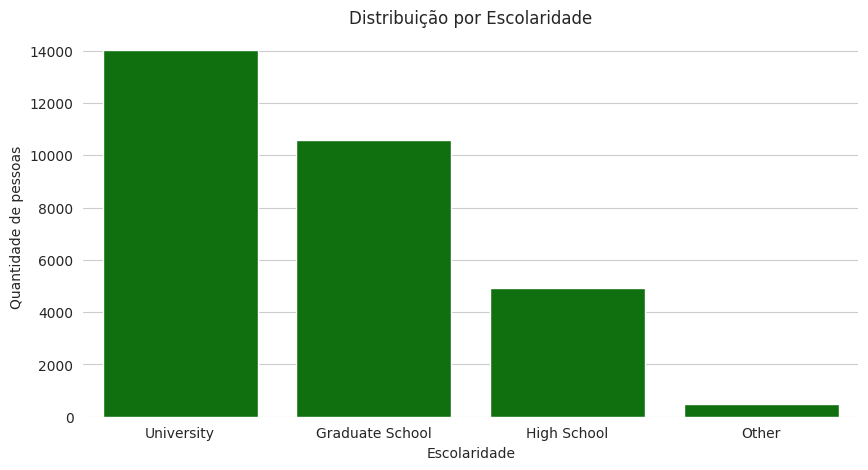

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
ax = sns.countplot(df, x = 'EDUCATION',color='green')

plt.ylabel('Quantidade de pessoas ')
plt.xlabel('Escolaridade')
plt.title('Distribuição por Escolaridade')
ax.set(frame_on=False)
plt.show()

In [ ]:
import plotly.express as px

fig = px.box(df, x="EDUCATION", y="LIMIT_BAL",title = 'Escolaridade X Crédito',
             labels={"EDUCATION":'Escolaridade',"LIMIT_BAL":'Crédito'},
             color= 'EDUCATION', color_discrete_sequence=['green','lightgreen','darkgreen','yellowgreen'])
fig.show()

In [ ]:
fig = px.histogram(df, x="EDUCATION", y="LIMIT_BAL",
             color='EDUCATION', text_auto='.2s',
            labels = {'EDUCATION':'Estado civil'},
                   title = 'Soma de Credidos por Estado Civil',
                   color_discrete_sequence=['green','lightgreen','darkgreen','yellowgreen'],
             height=400)
fig.show()

### Genero

No geral havia 18112 mulheres, por sua vez eram 11888 homens, isso significa que 60% dos dados eram do sexo feminino, enquanto 40% era masculino. As mulheres possuiam a menor media de idade, 35 anos, enquanto os homens tem media de idade de 36 ano.
As mulheres apresentam uma maior media  limite de credito, a media do credito feminino foi de 170086.5, enquanto o masculino foi 136250. A mulheres que cursaram o ensino superior e as pos-graduação estão em maior quantidade. As mulheres casadas tambem estão em maior numero, comparado ao homens casados.

In [ ]:
 df[['AGE','LIMIT_BAL','SEX','EDUCATION']].groupby('SEX').describe()

AGE                                                    LIMIT_BAL  \
          count       mean       std   min   25%   50%   75%   max     count   
SEX                                                                            
Female  18112.0  34.806868  9.029441  21.0  28.0  33.0  41.0  75.0   18112.0   
Male    11888.0  36.519431  9.404555  21.0  29.0  35.0  43.0  79.0   11888.0   

                                                                            \
                 mean            std      min      25%       50%       75%   
SEX                                                                          
Female  170086.462014  125231.777960  10000.0  70000.0  150000.0  240000.0   
Male    163519.825034  136250.481355  10000.0  50000.0  130000.0  240000.0   

                   
              max  
SEX                
Female  1000000.0  
Male     800000.0

In [ ]:
 df[['SEX','EDUCATION',"default payment next month"]].groupby('SEX').value_counts()

SEX     EDUCATION        default payment next month
Female  University       no                            6734
        Graduate School  no                            5101
        High School      no                            2235
        University       yes                           1922
        Graduate School  yes                           1130
        High School      yes                            692
        Other            no                             279
                         yes                             19
Male    University       no                            3966
        Graduate School  no                            3448
        High School      no                            1445
        University       yes                           1408
        Graduate School  yes                            906
        High School      yes                            545
        Other            no                             156
                         yes                    

In [ ]:
 df[['SEX','MARRIAGE',"default payment next month"]].groupby('MARRIAGE').value_counts()

MARRIAGE  SEX     default payment next month
Married   Female  no                            6609
          Male    no                            3844
          Female  yes                           1860
          Male    yes                           1346
Others    Female  no                             185
          Male    no                             103
          Female  yes                             47
          Male    yes                             42
Single    Female  no                            7555
          Male    no                            5068
          Female  yes                           1856
          Male    yes                           1485
dtype: int64

In [ ]:
fig = px.histogram(df, x="SEX",
             color='SEX',text_auto='.2s',
            labels = {'SEX':'Genero'}, title = 'Distribuição por Gênero',color_discrete_sequence=['lightgreen','darkgreen']

            )
fig.show()

In [ ]:
fig = px.histogram(df, x="EDUCATION",
             color='SEX', barmode='group',color_discrete_sequence=['lightgreen','darkgreen'],
            text_auto='.2s',
             height=400)
fig.show()

###Estado Civil

As pessoa com familia ela tem um cridito agregado, isto é, isto é no caso de alguem cadado o valor do credito é do casal, por sua vez alguem solteiro terá um credito só seu.

Assim pessoas casadas possuem, em média,mais credito que as solteiras, mas é importante dizer que a diferença é pequena. Nos dados 53.21% das pessoa eram solteiras, 45.53% casadas e o restante não constava.

In [ ]:
  df[['AGE','LIMIT_BAL','SEX','EDUCATION','MARRIAGE']].groupby('MARRIAGE').describe()

AGE                                                     \
            count       mean       std   min   25%   50%   75%   max   
MARRIAGE                                                               
Married   13659.0  40.016692  8.720326  21.0  34.0  39.0  46.0  79.0   
Others      377.0  42.084881  9.484490  22.0  35.0  43.0  49.0  65.0   
Single    15964.0  31.452706  7.592002  21.0  26.0  29.0  35.0  70.0   

         LIMIT_BAL                                                            \
             count           mean            std      min      25%       50%   
MARRIAGE                                                                       
Married    13659.0  182200.893184  133382.262668  10000.0  70000.0  160000.0   
Others       377.0  103076.923077   95572.613160  10000.0  40000.0   60000.0   
Single     15964.0  156413.660737  125673.426316  10000.0  50000.0  130000.0   

                               
               75%        max  
MARRIAGE                       
Married   260000.0  1000000.0  
Others    140000.0   500000.0  
Single    220000.0   800000.0

In [ ]:
df[['EDUCATION','MARRIAGE']].groupby('MARRIAGE').value_counts()

MARRIAGE  EDUCATION      
Married   University         6842
          Graduate School    3722
          High School        2861
          Other               234
Others    University          168
          High School         147
          Graduate School      54
          Other                 8
Single    University         7020
          Graduate School    6809
          High School        1909
          Other               226
dtype: int64

In [ ]:
fig = px.histogram(df, x="MARRIAGE",
             color='MARRIAGE',text_auto='.2s',
            labels = {'MERRIAGE':'Estado civil'}, title = 'Distribuição por Estado civil',color_discrete_sequence=['lightgreen','darkgreen','green']
            )
fig.show()

In [ ]:

fig = px.histogram(df, x="MARRIAGE", y="LIMIT_BAL",
             color='MARRIAGE', text_auto='.2s',
            labels = {'MARRIAGE':'Estado civil'},
                   title = 'Soma de Credidos por Estado Civil',
                   color_discrete_sequence=['lightgreen','darkgreen'],
             height=400)
fig.show()

# Inadimplencia

In [ ]:
df['default payment next month'].value_counts()

no     23364
yes     6636
Name: default payment next month, dtype: int64

In [ ]:
df['default payment next month'].value_counts(normalize=True)

no     0.7788
yes    0.2212
Name: default payment next month, dtype: float64

In [ ]:
fig = px.histogram(df, x="default payment next month",
             color='default payment next month',text_auto='.2s',
            labels = {'default payment next month':'Inadimplencia'},
            title = 'Quantidade de Inadimplentes',
            color_discrete_sequence=['red','darkgreen'],

            )
fig.show()

In [ ]:
df[['AGE','LIMIT_BAL','default payment next month']].groupby('default payment next month').describe()

AGE                                         \
                              count       mean       std   min   25%   50%   
default payment next month                                                   
no                          23364.0  35.417266  9.077355  21.0  28.0  34.0   
yes                          6636.0  35.725738  9.693438  21.0  28.0  34.0   

                                       LIMIT_BAL                 \
                             75%   max     count           mean   
default payment next month                                        
no                          41.0  79.0   23364.0  178099.726074   
yes                         42.0  75.0    6636.0  130109.656420   

                                                                       \
                                      std      min      25%       50%   
default payment next month                                              
no                          131628.359660  10000.0  70000.0  150000.0   
yes                         115378.540571  10000.0  50000.0   90000.0   

                                                 
                                 75%        max  
default payment next month                       
no                          250000.0  1000000.0  
yes                         200000.0   740000.0

In [ ]:
df[['default payment next month','MARRIAGE']].groupby('default payment next month').value_counts()

default payment next month  MARRIAGE
no                          Single      12623
                            Married     10453
                            Others        288
yes                         Single       3341
                            Married      3206
                            Others         89
dtype: int64

In [ ]:
df[['default payment next month','SEX']].groupby('default payment next month').value_counts()

default payment next month  SEX   
no                          Female    14349
                            Male       9015
yes                         Female     3763
                            Male       2873
dtype: int64

In [ ]:
df2[['default payment next month','faixa_etaria']].groupby('default payment next month').value_counts(normalize=True)

default payment next month  faixa_etaria
no                          adulto          0.623994
                            jovem           0.365605
                            idoso           0.010401
yes                         adulto          0.613171
                            jovem           0.372363
                            idoso           0.014467
dtype: float64

In [ ]:
df2[['faixa_etaria','MARRIAGE','default payment next month']].groupby('default payment next month').value_counts(normalize=True)

default payment next month  faixa_etaria  MARRIAGE
no                          adulto        Married     0.379344
                            jovem         Single      0.304186
                            adulto        Single      0.234378
                            jovem         Married     0.059622
                            adulto        Others      0.010272
                            idoso         Married     0.008432
                            jovem         Others      0.001798
                            idoso         Single      0.001712
                                          Others      0.000257
yes                         adulto        Married     0.397529
                            jovem         Single      0.296715
                            adulto        Single      0.204491
                            jovem         Married     0.073538
                            idoso         Married     0.012055
                            adulto        Others      0.011151
    

In [ ]:
fig = px.histogram(df, x="SEX",
             color='default payment next month', barmode='group',color_discrete_sequence=['red','darkgreen'],
            text_auto='.2s', title='Numero de Inadimplentes por Genero',
             height=400)
fig.show()

In [ ]:

fig = px.histogram(df2, x="faixa_etaria",
             color='default payment next month', barmode='group',color_discrete_sequence=['red','darkgreen'],
            text_auto='.2s', title='Numero de Inadimplentes por faixa etaria',
             height=400)
fig.show()

In [ ]:
fig = px.box(df2,
             x="faixa_etaria",
             y="LIMIT_BAL", color="default payment next month",
        labels = {"faixa_etaria": 'Faixa Etaria',"LIMIT_BAL": 'Credito', "default payment next month": "Inadimplencia"},
             color_discrete_sequence=['green','red'])
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [ ]:
fig = px.histogram(df, x="EDUCATION",
             color='default payment next month', barmode='group',color_discrete_sequence=['red','darkgreen'],
            text_auto='.2s', title='Numero de Inadimplentes por Escolaridade',
             height=400)
fig.show()

In [ ]:
fig = px.box(df,
             x="SEX",
             y="LIMIT_BAL", color="default payment next month",
        labels = {"SEX": 'Genero',"LIMIT_BAL": 'Credito', "default payment next month": "Inadimplencia"},
             color_discrete_sequence=['green','red'])
fig.update_traces(quartilemethod="exclusive")
fig.show()

# Perguntas:

1 - Tendo em vista que há uma diferença entre o credito de pessoas solteiras e casadas, qual grupo possui credito maior?

2- Qual a maior media de credito por genero? E que percentual dessas pessoas são casadas?

3- Qual o percentual de inadimplentes?

4- Qual a porcentagem de pessoas abaixo de 30 anos que não conseguem pagar as suas dívidas? E os idosos, eles conseguem quitar o que devem? Qual faixa de idade é a maior devedora?

5 - Pessoas com poder aquisitivo maior que a media, se endividam mais, do que pessoas com menor poder aquisitivo

6- A disponibilade de credito é maior para pessoa com que nível de esolaridade?
Pessoas com nível superior gerenciam melhor suas dividas?

### **Respostas**

1. Os casado possuem um credido unido, isso é o credito é da familia, se avaliar a media maior que os solteiros, mas ao somar tudo os valores são bem proximos.

2. AS mulheres possuem a maior media de credito, isto é, 170086, sendo um total de 8469 mulheres casadas, isso representa 28.23% do total e 46.76% das mulheres

3. Os inadimplentes aparecem com 22,88%

4. Há 22.44% de pessoas com menos de 30 anos inadimplentes, por sua vez os idosos, inadimpletes são 28.32. Os mais devedores estão entre 30 e 60 anos, no total são 4069 pessoas, sendo 61.32% das pessoas devedoras.

5. Sim, no 4646 que possuiam poder aquisitivo menor que a media estavam endividadas, isso representa 70% do endividados

6. As pessoa que possuem nível superior tem um credito maior, principalmente, pessoas com pos-graduação. Entre os inadimplentes quem possui graduação e pos são maior numero, 3330 e 2036, respectivamente.

# Isight

* É provavel que pessoas inadimplentes tenham utilizado esse credito para custearseu estudos, levanso em consideração o maior numero de inadimplentes com alto nível de escolaridade

* Levado em conta o nivel de escolaridade, pessoas com menor nível de estudo têm menor poder aquisitivo ou maior controle sobre gastos, levando a ter maior controle de suas dividas
* No geral as pessoas inadimplentes são mulheres, pessoas entre 30 e 40 anos, casadas e com nível superior.
* Mulheres, principalmente, mulheres casadas, gerenciam as dispesas das casa e da familia, possibilitando maior numero de dividas sobre sua responsabilidade